<a href="https://colab.research.google.com/github/fabiobatoni/escolaridade_x_producao_hospitalar/blob/main/Notebooks/Escolaridade_x_Produ%C3%A7%C3%A3oHospitalar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caderno exploração dos dados:
*   Datasus Censo 2010 (Escolaridade)
*   Datasus Gastos materiais hospitalares 
 

A Pesquisa Nacional por Amostra de Domicílios (Pnad) considera todos com mais de 15 anos de idade que não sabem ler, nem escrever. No Brasil, segundo o estudo de 2013, a taxa está em 8,7% da população.
https://educacaointegral.org.br/glossario/analfabetismo/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/fabiobatoni/escolaridade_x_producao_hospitalar/main/Dados/A144102189_28_143_208.csv', encoding="ISO-8859-1", engine='python', 
                   skiprows = 3, sep=";", skipfooter=7, 
                   thousands=".", decimal=",", index_col=0).drop('Total', axis=1)

dados.head()

**Qual a maior porcentagem de escolaridade ?**

In [ ]:
dados.mean()

# 50% da população em 2010 possuem fundamental completo ou mais

In [ ]:
estados_escolaridade = dados['2º ciclo fundamental completo ou mais'].sort_values(ascending=False)

In [ ]:
estados_escolaridade

Selecionei os 5 estados com o numero de populacao parecidos: 

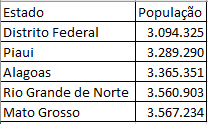

https://www.cnnbrasil.com.br/nacional/populacao-brasileira-chega-a-2133-milhoes-de-pessoas-em-2021-diz-ibge/

Dos 5 estados , vamos selecionar apenas Piaui, Alagoas, Rio Grande do Norte e Mato Grosso que coencidentemente fazem parte da Região do Nordeste

In [ ]:
piaui_esc = estados_escolaridade.loc[['22 Piauí']]
alagoas_esc = estados_escolaridade.loc[['27 Alagoas']]
rio_grande_norte_esc = estados_escolaridade.loc[['24 Rio Grande do Norte']]
mato_grosso_esc = estados_escolaridade.loc[['51 Mato Grosso']]

In [ ]:
cinco_estados_escolaridade = pd.concat([ piaui_esc, alagoas_esc, rio_grande_norte_esc, mato_grosso_esc])
cinco_estados_escolaridade = cinco_estados_escolaridade.sort_values(ascending=False)
cinco_estados_escolaridade

# **Dados de Consumo hospitalar**

In [ ]:
url = 'https://raw.githubusercontent.com/fabiobatoni/escolaridade_x_producao_hospitalar/main/Dados/A131729189_28_143_208.csv'

dados_2 = pd.read_csv(url, encoding="ISO-8859-1", engine='python', 
                   skiprows = 3, sep=";", skipfooter=12, 
                   thousands=".", decimal=",", index_col=0).drop('Total', axis=1)

dados_2.head()

**Tratando dados de consumo**

In [ ]:
dados_2.isnull().sum().sum()

Observe que o dados nullos estao somando em zero por conta dos tipo "object" 

In [ ]:
dados_2.info()

Usando a biblioteca numpy para trocar por Not a Number

In [ ]:
dados_2 = dados_2.replace('-', np.nan)

In [ ]:
dados_2.T.info()

In [ ]:
dados_2.isnull().sum().sum()

In [ ]:
dados_2 = dados_2.astype('float64')

Pegar dados de 2010

In [ ]:
dados_2010 = ['2010/Jan', '2010/Fev', '2010/Mar', '2010/Abr',
       '2010/Mai', '2010/Jun', '2010/Jul', '2010/Ago', '2010/Set', '2010/Out', '2010/Nov', '2010/Dez']

dados_2010

In [ ]:
dados_ano_2010 = dados_2[dados_2010]


In [ ]:
pd.set_option('float_format', '{:.3f}'.format)

In [ ]:
dados_ano_2010

In [ ]:
dados_ano_2010["Total"] = dados_ano_2010.sum(axis=1)

In [ ]:
dados_ano_2010

In [ ]:
piaui = dados_ano_2010.loc[['22 Piauí']]
alagoas = dados_ano_2010.loc[['27 Alagoas']]
rio_grande_norte = dados_ano_2010.loc[['24 Rio Grande do Norte']]
mato_grosso = dados_ano_2010.loc[['51 Mato Grosso']]



In [ ]:
cinco_estados_gastos = pd.concat([piaui, alagoas, rio_grande_norte, mato_grosso])

In [ ]:
cinco_estados_gastos = cinco_estados_gastos.sort_values("Total", ascending=False)

In [ ]:
cinco_estados_gastos

# Comparar se os gastos dos estados sao ordenados de acordo com a escolaridade

In [ ]:
plt.show()
ax = cinco_estados_escolaridade.plot(kind="bar",figsize=(10,6))
ax.legend(fontsize = 16)
ax.set_title("Comparacao de escolaridade", fontsize=24)
ax.tick_params(labelsize=12)
ax.set_ylabel('Porcentagem (%)', fontsize=18)
ax.set_xlabel('Estados(Nordeste)', fontsize = 18)
plt.show()

In [ ]:
ax = cinco_estados_gastos.plot(kind="bar", y = 'Total',figsize=(10,6))
ax.legend(fontsize = 16)
ax.set_title("Comparacao de Gastos", fontsize=24)
ax.tick_params(labelsize=12)
ax.set_ylabel('Milhões R$', fontsize=18)
ax.set_xlabel('Estados(Nordeste)', fontsize = 18)
plt.show()

Será que o Estado que possui maior escolaridade , gasta mais, por irem mais vezes aos hospitais por conta da informação ou gastam menos por saberem se prevenir de doenças, assim evitando a ida ao hospital ?

**Minha Hipótese** seria que o estado que possui maior grau de escolaridade gastaria menos que outro que possui menor.

Porém analisando o estados da Região do Nordeste que possui taxa populacional parecidas, não é possível obter essa conclusão.

